# Cardiotocography

## Fetal state class code prediction

---

**Child birth and labor** is a very delicate matter in medical practices due to which utmost care is obligated involving various probing measures and fetal well-being. According to past researches, [**Antepartum Fetal Heart Rate**](https://pubmed.ncbi.nlm.nih.gov/2673612/) is considered a primal factor to determine whether the delivery will be stressful or non-stressful. 

Keeping the above concept as an underlying goal in fetal delivery, the application of [**Cardiotocography**](https://patient.info/pregnancy/cardiotocography) came into existence. The measure of fetal heart rate and mother's uterine contraction can be accomplished by using ultrasound waves as an input and recording it's behaviour inside pregnant mother graphically as an output, making the output more interpretable. The instrument/device used for this purpose is a Cardiotocograph and this technique is called Cardiotocography.

Now, the part where Data Science and Machine Learning comes into picture is when the fetal heart rate (FHR) and uterine contraction data is generated in the form of graph. Post interpretation of the graph, alot of variables are generated which directly or indirectly affects the FHR and they can be used to predict the fetal state belonging to 3 classes - **N = Normal, S = Suspect and P = Pathologic**. 

The dataset was taken from [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/cardiotocography). **2126** fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a **morphologic pattern** (A, B, C. ...) and to a **fetal state** (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments. I focused on the prediction of 3-class fetal state in my study of the case. 

In [29]:
#basic libraries for data processing and manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", palette = "RdBu")
import warnings
warnings.filterwarnings("ignore")

#modeling packages
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelBinarizer

In [2]:
#importing our dataset
ctg_data = pd.read_excel("raw_data.xlsx")
ctg_data

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,1996-12-01,CTG0001.txt,240,357,120,120,0,0,0,...,0,0,0,0,0,0,1,0,9,2
1,Fmcs_1.txt,1996-05-03,CTG0002.txt,5,632,132,132,4,0,4,...,0,0,0,1,0,0,0,0,6,1
2,Fmcs_1.txt,1996-05-03,CTG0003.txt,177,779,133,133,2,0,5,...,0,0,0,1,0,0,0,0,6,1
3,Fmcs_1.txt,1996-05-03,CTG0004.txt,411,1192,134,134,2,0,6,...,0,0,0,1,0,0,0,0,6,1
4,Fmcs_1.txt,1996-05-03,CTG0005.txt,533,1147,132,132,4,0,5,...,0,0,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,S8001045.dsp,1998-06-06,CTG2124.txt,2059,2867,140,140,0,0,6,...,0,0,1,0,0,0,0,0,5,2
2122,S8001045.dsp,1998-06-06,CTG2125.txt,1576,2867,140,140,1,0,9,...,0,0,1,0,0,0,0,0,5,2
2123,S8001045.dsp,1998-06-06,CTG2126.txt,1576,2596,140,140,1,0,7,...,0,0,1,0,0,0,0,0,5,2
2124,S8001045.dsp,1998-06-06,CTG2127.txt,1576,3049,140,140,1,0,9,...,0,0,1,0,0,0,0,0,5,2


In [3]:
ctg_data.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [4]:
ctg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   FileName  2126 non-null   object        
 1   Date      2126 non-null   datetime64[ns]
 2   SegFile   2126 non-null   object        
 3   b         2126 non-null   int64         
 4   e         2126 non-null   int64         
 5   LBE       2126 non-null   int64         
 6   LB        2126 non-null   int64         
 7   AC        2126 non-null   int64         
 8   FM        2126 non-null   int64         
 9   UC        2126 non-null   int64         
 10  ASTV      2126 non-null   int64         
 11  MSTV      2126 non-null   float64       
 12  ALTV      2126 non-null   int64         
 13  MLTV      2126 non-null   float64       
 14  DL        2126 non-null   int64         
 15  DS        2126 non-null   int64         
 16  DP        2126 non-null   int64         
 17  DR        2126

In [5]:
#removing un-usable columns
ctg_data.drop(["FileName", "Date", "SegFile"], axis = 1, inplace = True)

## EDA

### Analysing target variable (NSP)

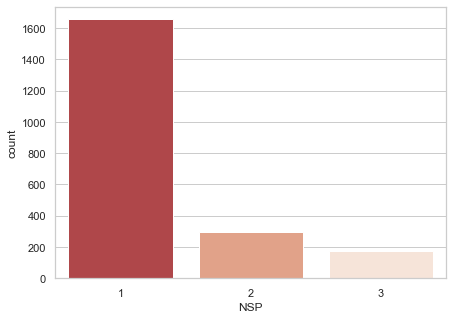

In [6]:
plt.figure(figsize = (7, 5))
sns.countplot(ctg_data["NSP"])
plt.show()

In [7]:
(ctg_data["NSP"].value_counts()/len(ctg_data))*100

1    77.845720
2    13.875823
3     8.278457
Name: NSP, dtype: float64

#### Basic inferences -
- Our dataset has **2126 rows × 37 columns**, only 2 columns contain **float** values whereas all other columns are **int** type
- The target variable has 3 classes: **1 - Normal**, **2 - Suspecious** and **3 - Pathologic**.
- High class-imbalance is **present** in the target variable which needs to be neutralised while modeling.

### Independent variables analysis

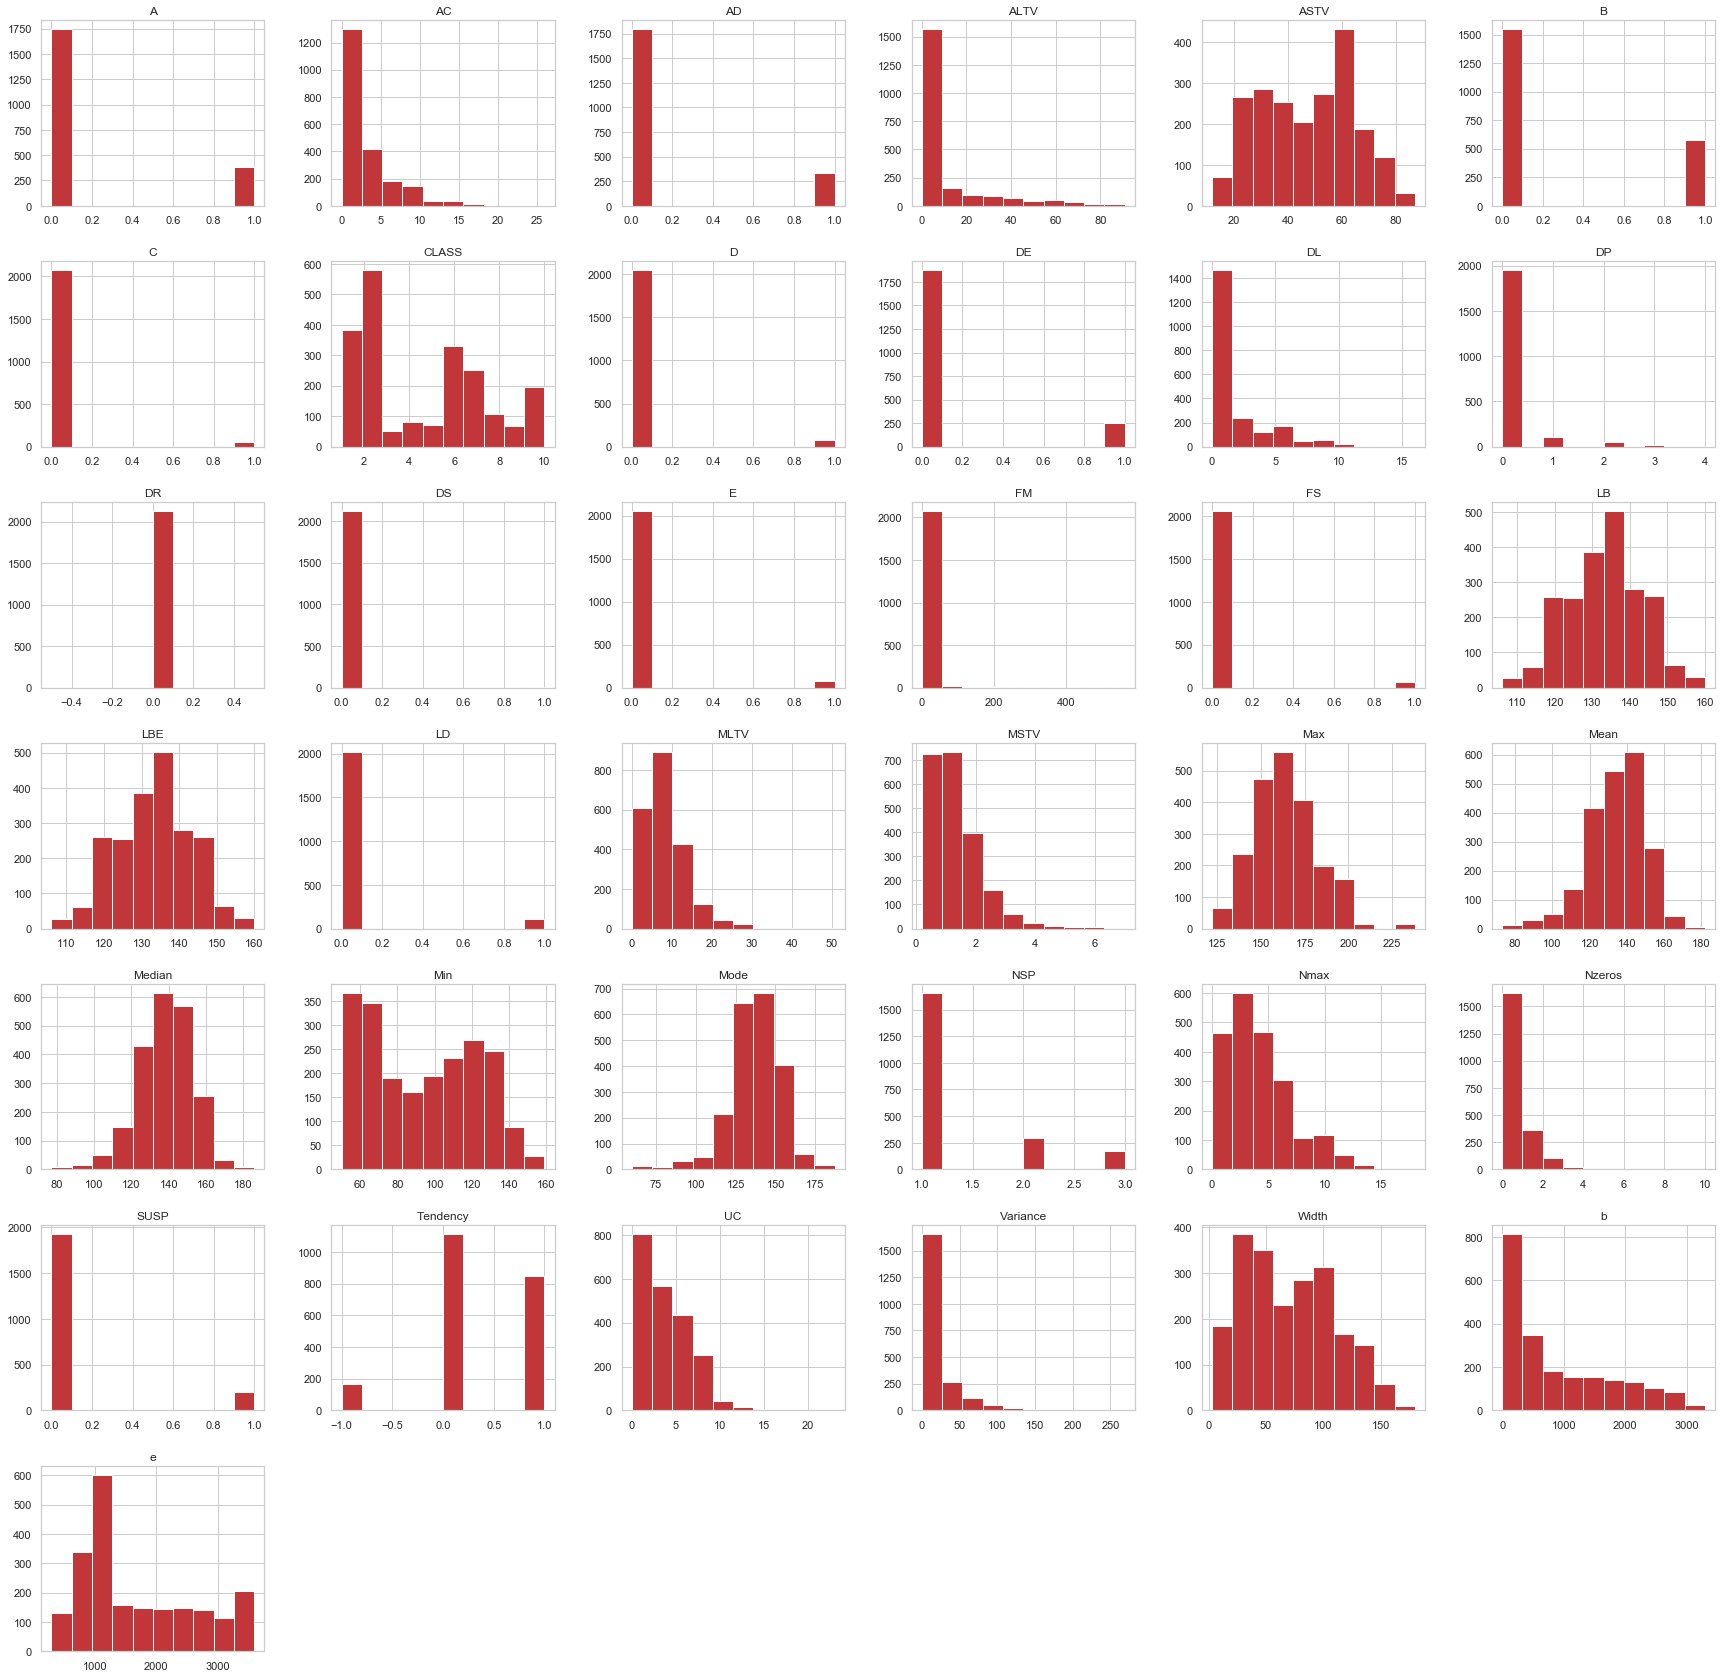

In [8]:
ctg_data.hist(figsize = (30, 30))
plt.show()

In [9]:
#making a list of some discrete variables having binary or so, types of value
dis_vars = ctg_data[["A", "AD", "B", "C", "D", "DE", "DP", "DR", "DS", "E", "FS", "LD", "SUSP", "Tendency"]]

In [10]:
ctg_data.isnull().sum()

b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [11]:
relation = ctg_data.corr()
print("\n-Top 10 positively correlated feats w.r.t NSP:\n{}".format(relation["NSP"].sort_values(ascending = False)[:11]))
print("\n\n-Top 10 negatively correlated feats w.r.t NSP:\n{}".format(relation["NSP"].sort_values()[:10]))


-Top 10 positively correlated feats w.r.t NSP:
NSP         1.000000
CLASS       0.643034
LD          0.635526
FS          0.501290
DP          0.490626
ASTV        0.471191
ALTV        0.426146
SUSP        0.364583
Variance    0.206630
E           0.199349
LBE         0.148151
Name: NSP, dtype: float64


-Top 10 negatively correlated feats w.r.t NSP:
AC         -0.340394
B          -0.303112
Mode       -0.250412
A          -0.228640
Mean       -0.226985
MLTV       -0.226797
AD         -0.208922
Median     -0.205033
UC         -0.163295
Tendency   -0.131976
Name: NSP, dtype: float64


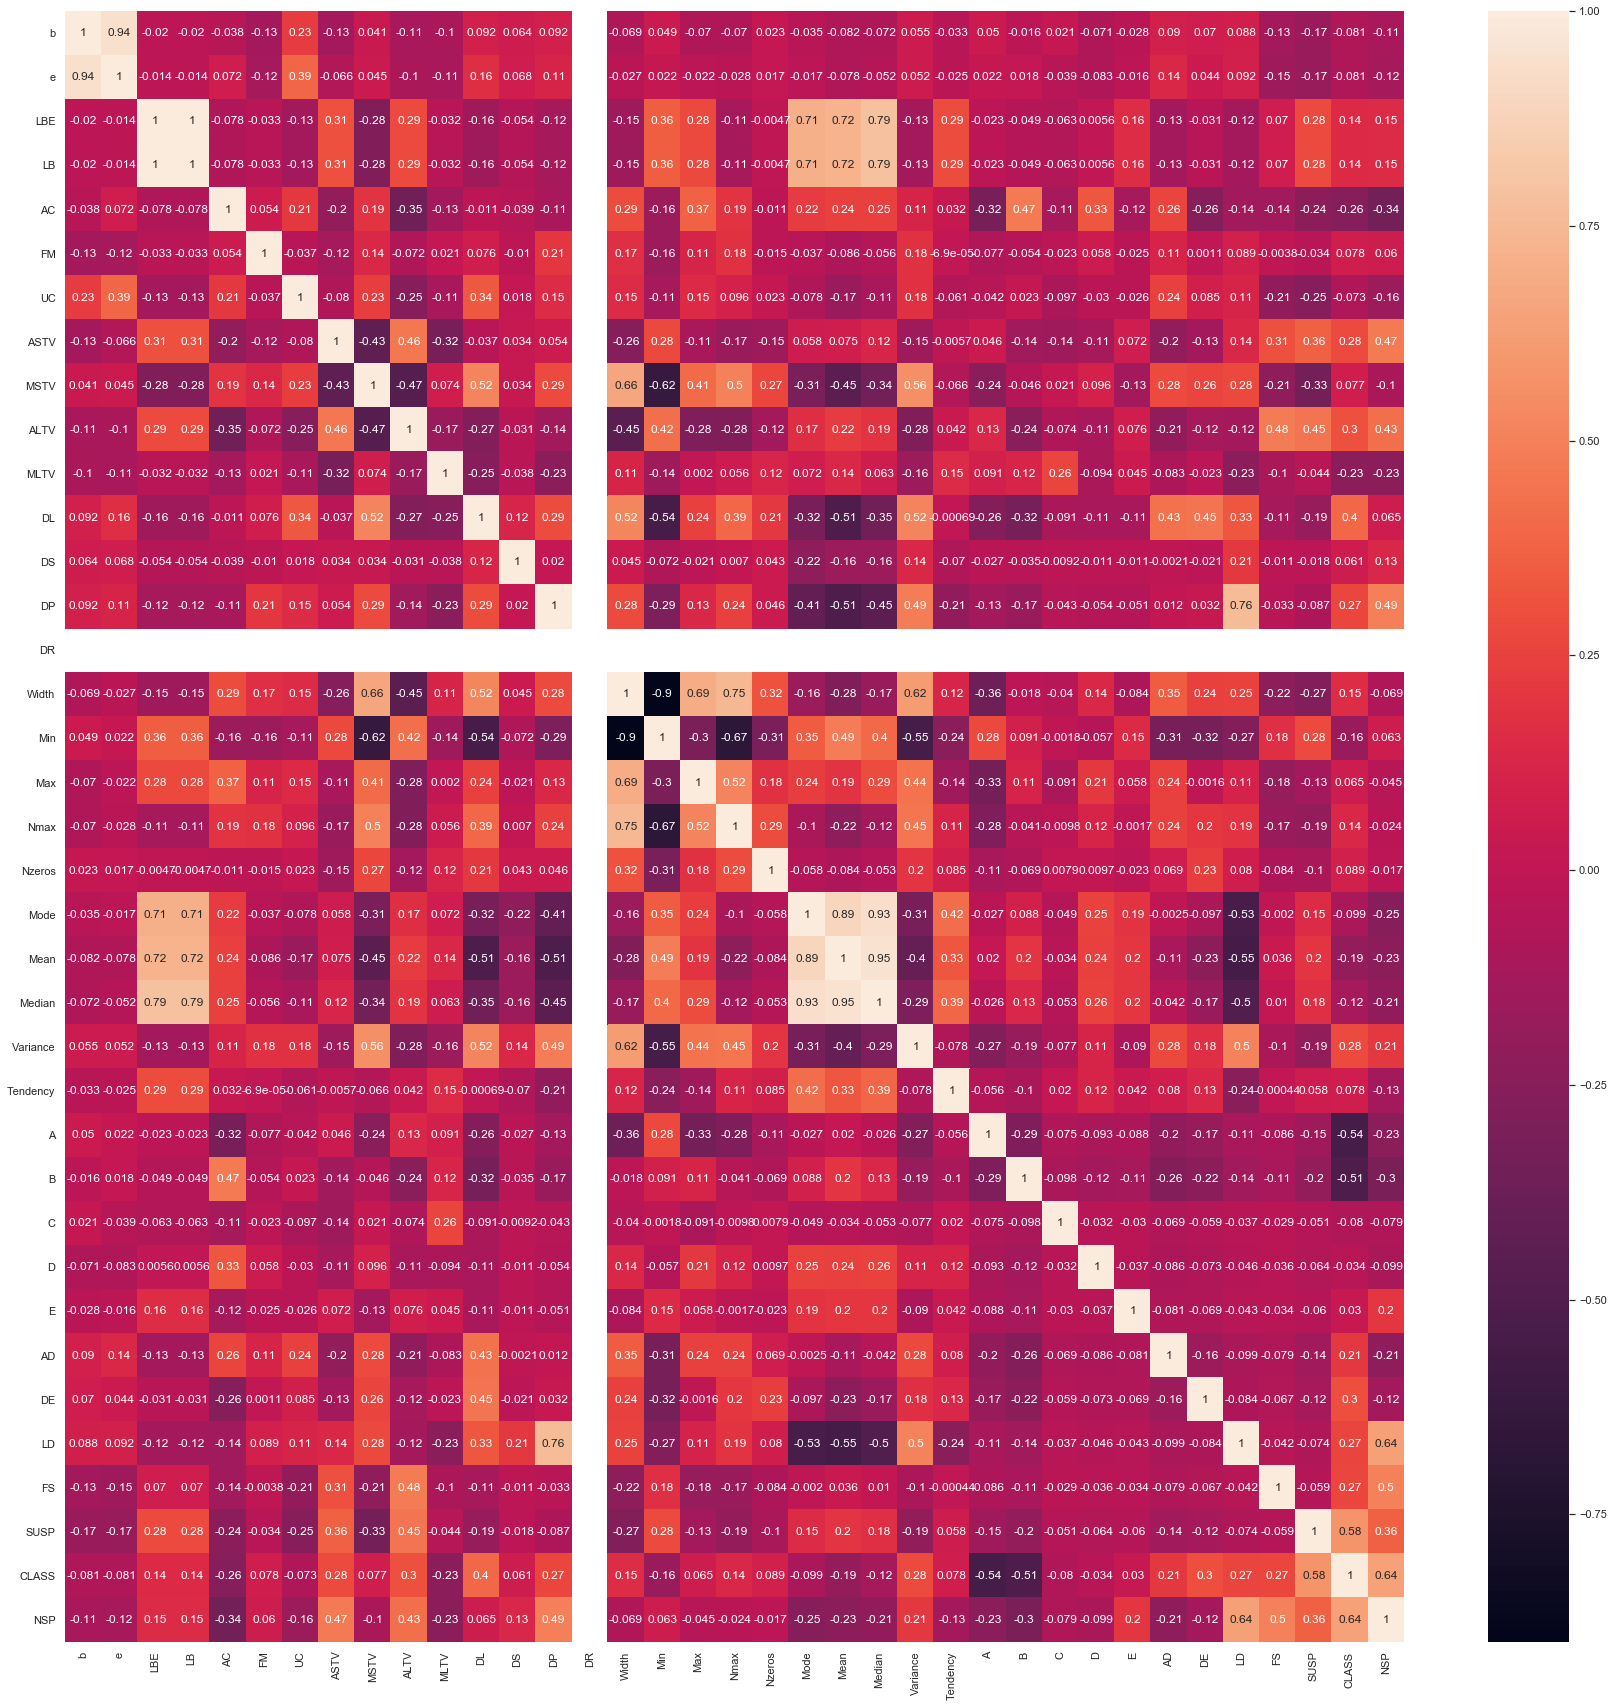

In [12]:
#heatmap
plt.figure(figsize = (30, 30))
sns.heatmap(ctg_data.corr(),  annot = True)
plt.show()

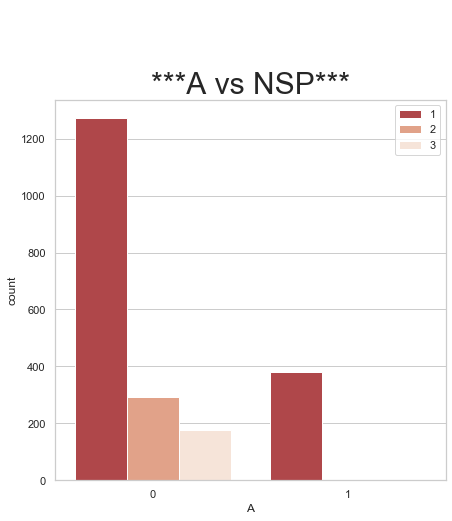

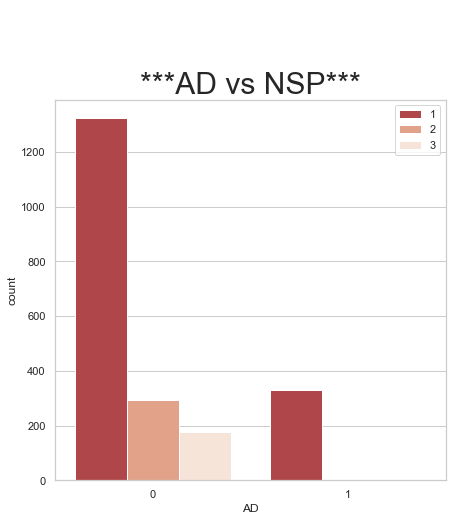

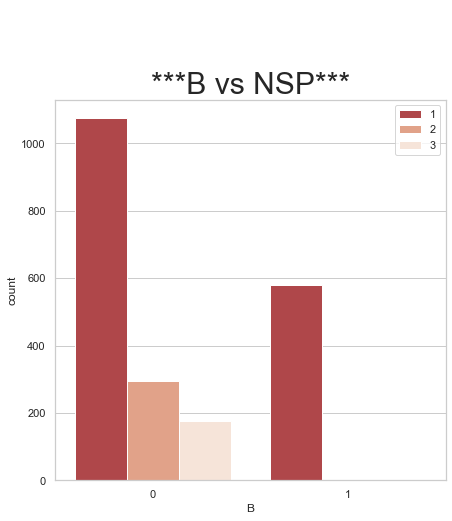

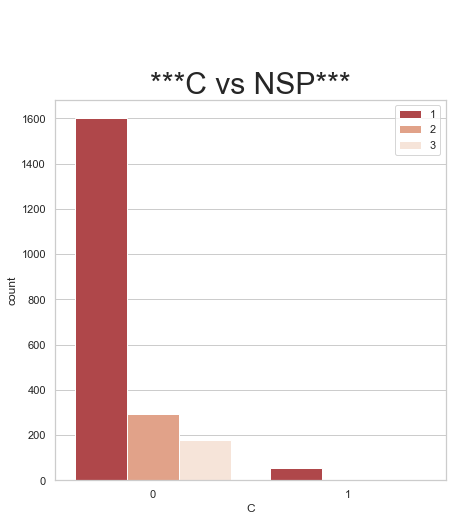

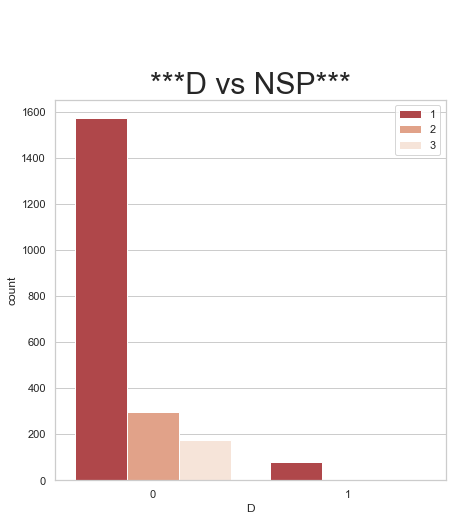

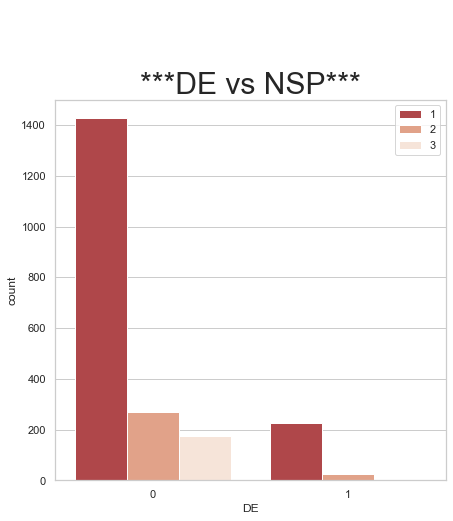

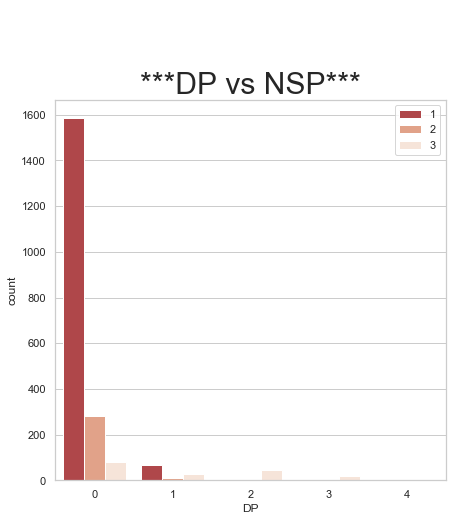

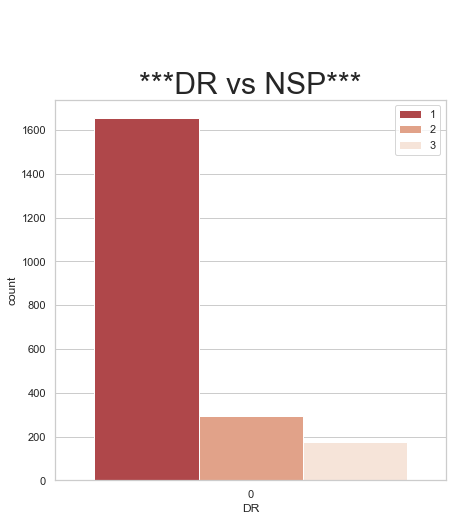

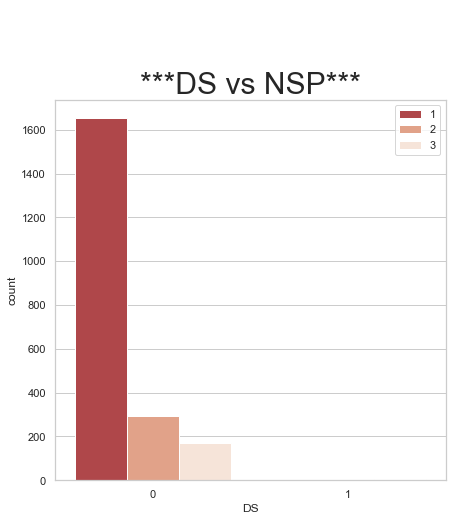

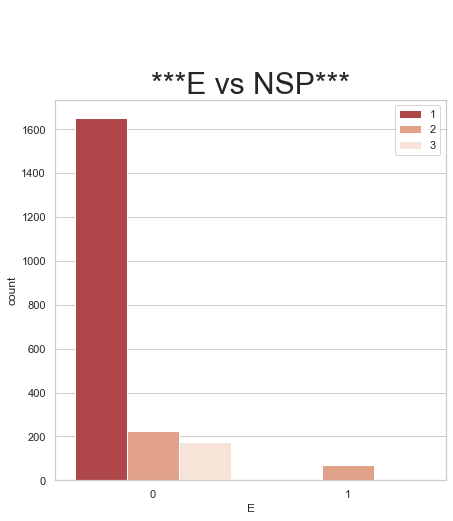

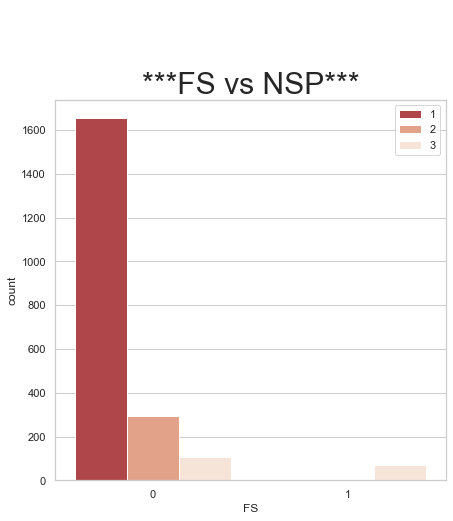

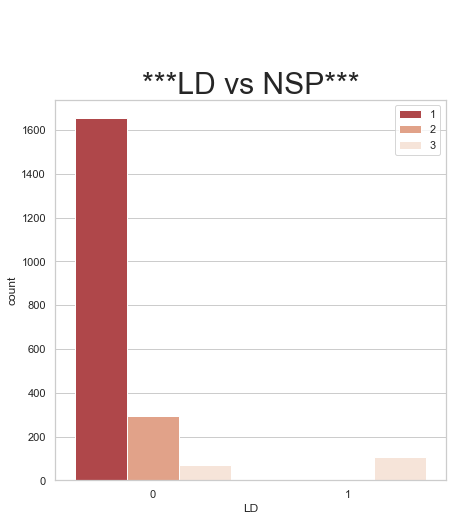

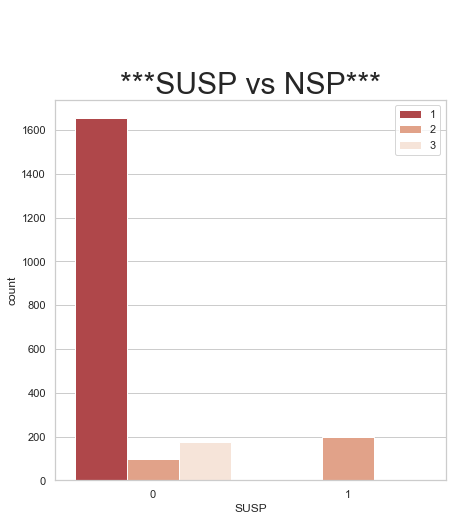

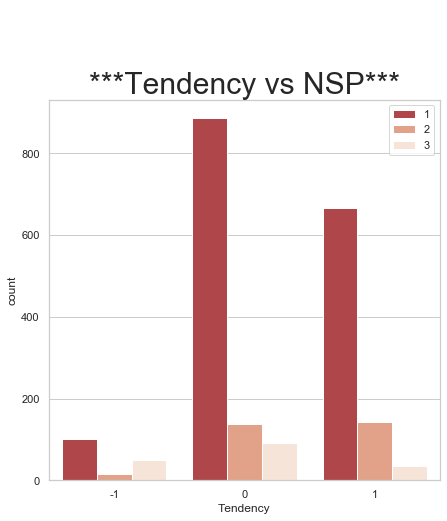

In [13]:
#visualizing the relationship between dis_vars and target variable
for i in dis_vars.columns:
    
    plt.figure(figsize = (7, 7))
    sns.countplot(dis_vars[i], hue = ctg_data["NSP"])
    plt.title(label = "\n\n***{} vs NSP***".format(i), fontsize = 30)
    plt.legend(loc = 1)
    plt.show()

- The class imbalance of NSP is leading to highly imbalanced class distribution as viewing w.r.t some other variables
- But **DR** variable is only having 0 values, so must be removed.

In [14]:
#removing DR variable
ctg_data.drop(["DR"], axis = 1, inplace = True)

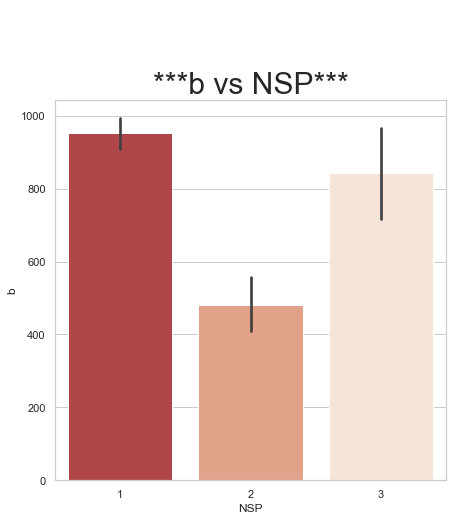

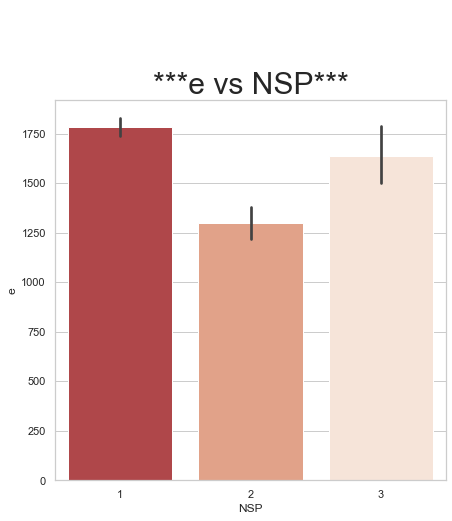

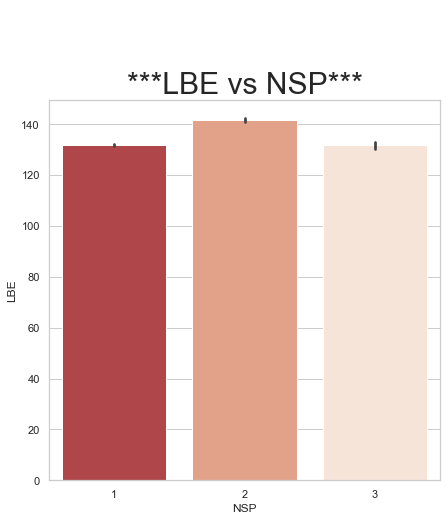

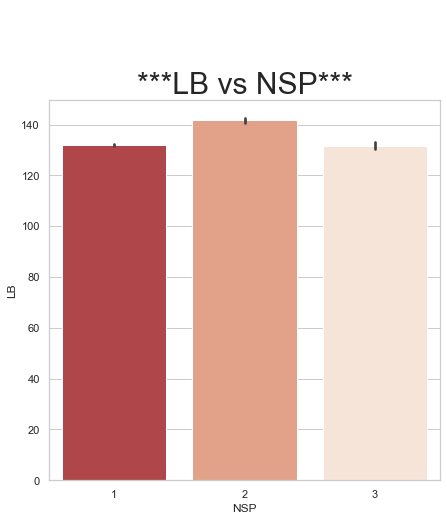

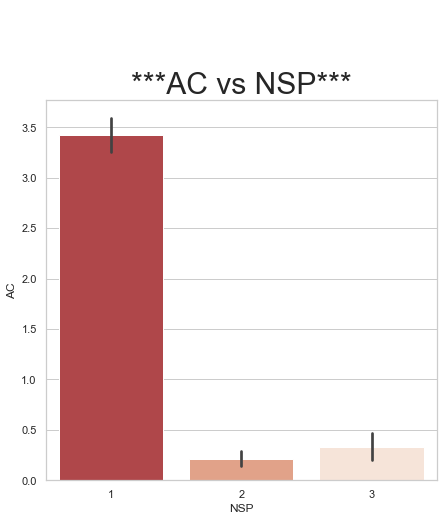

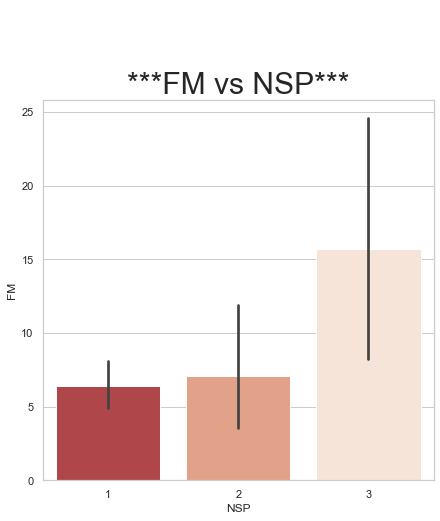

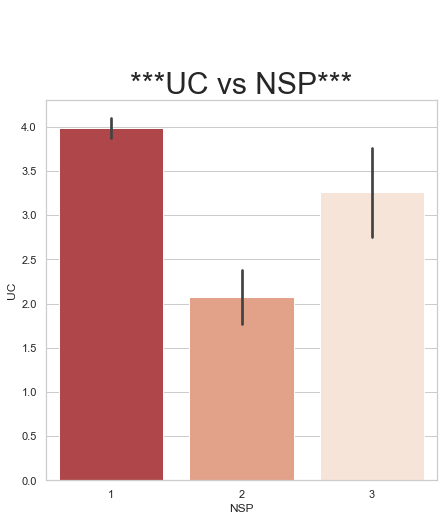

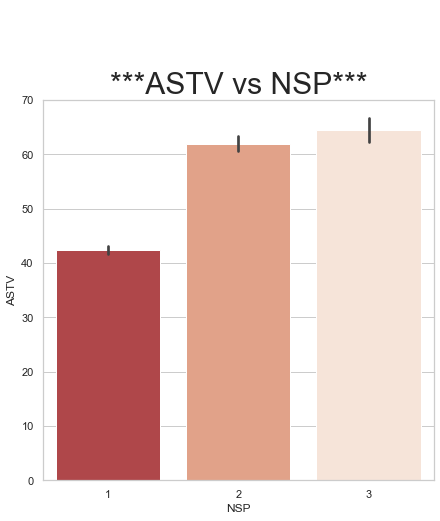

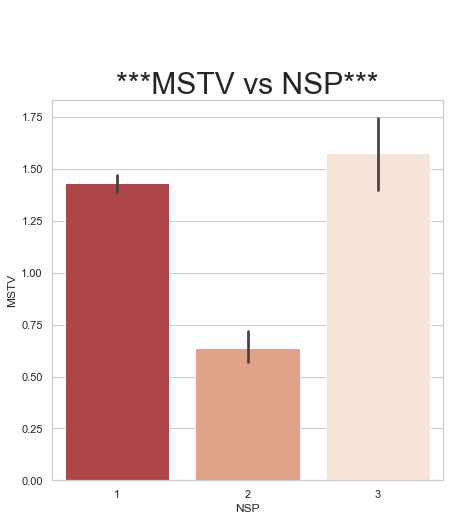

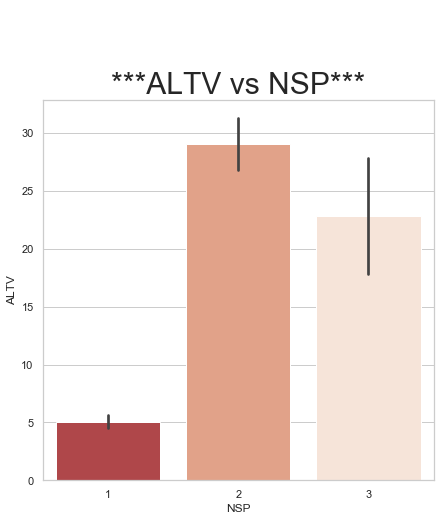

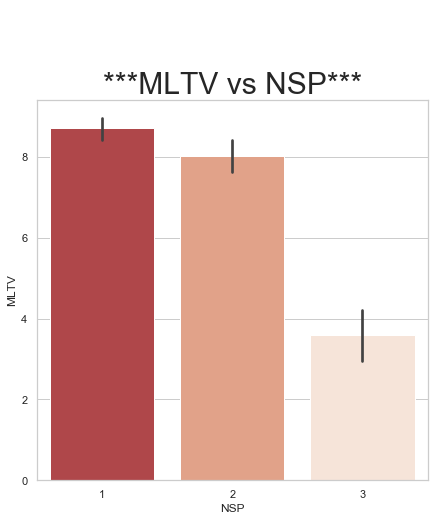

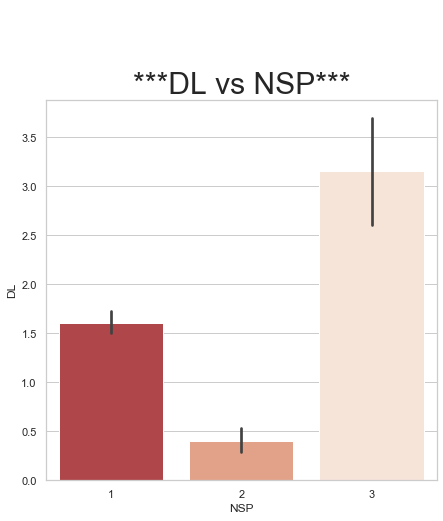

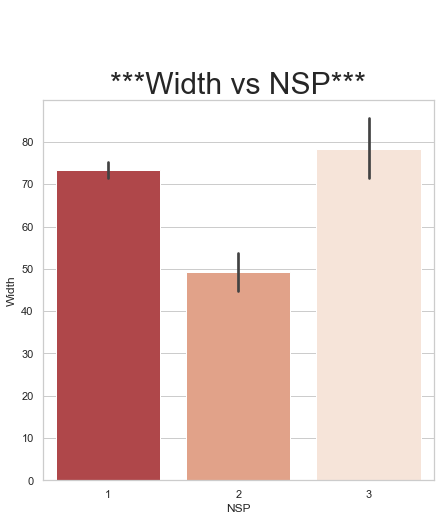

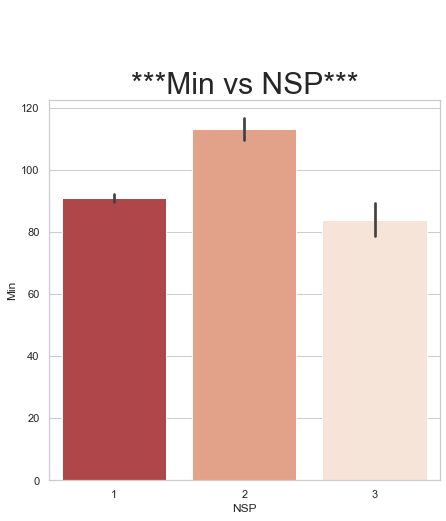

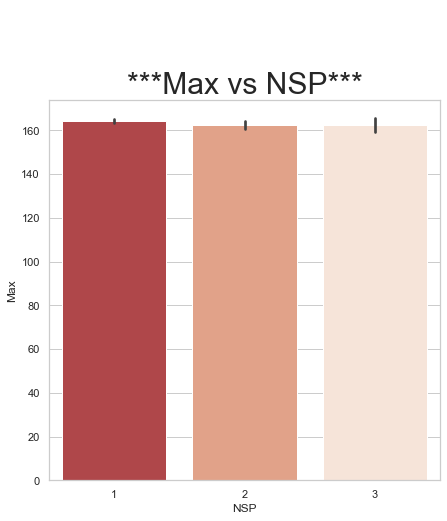

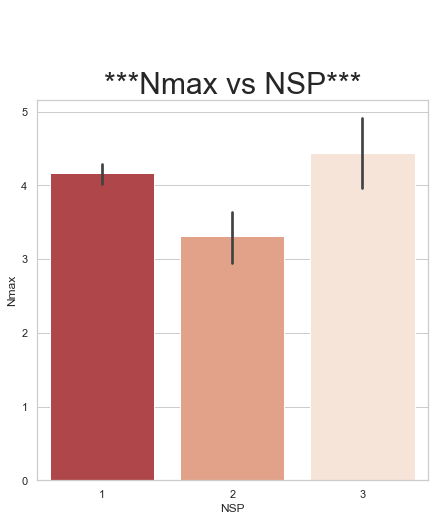

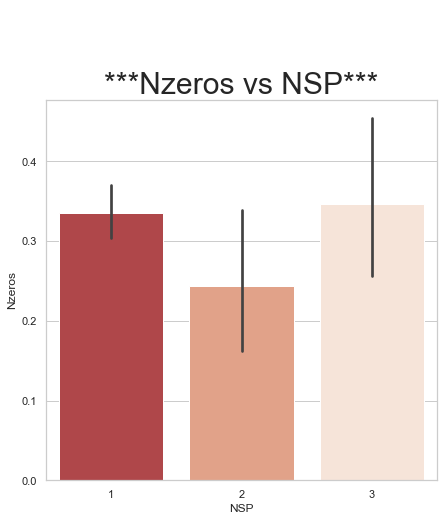

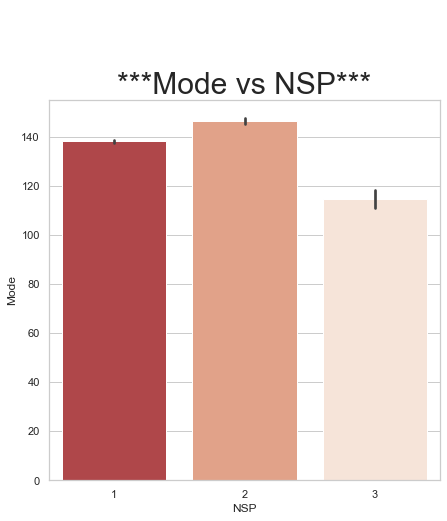

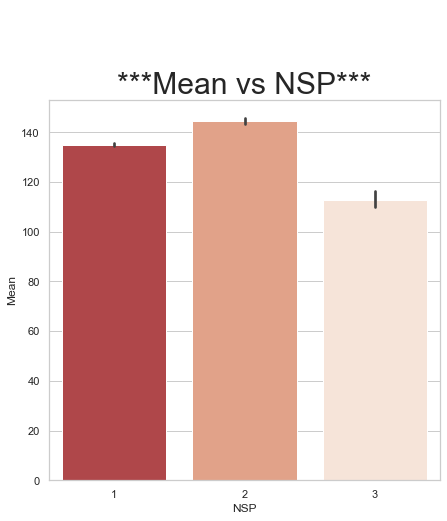

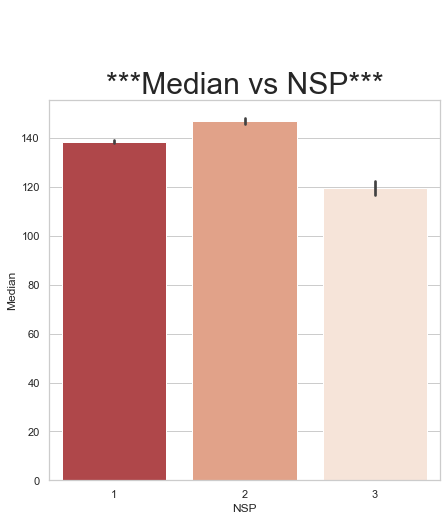

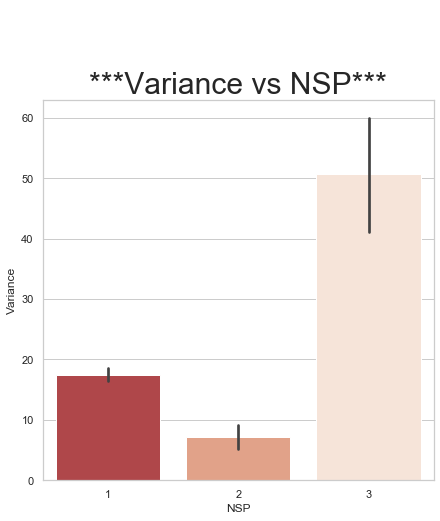

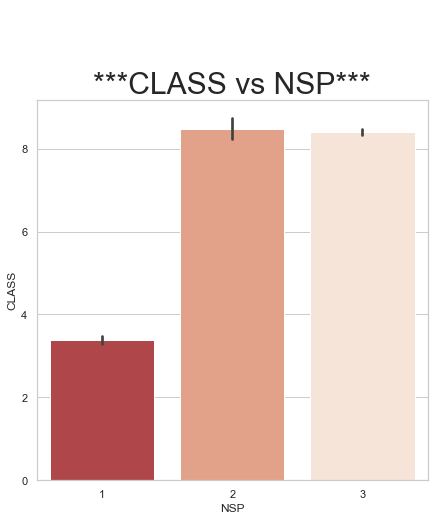

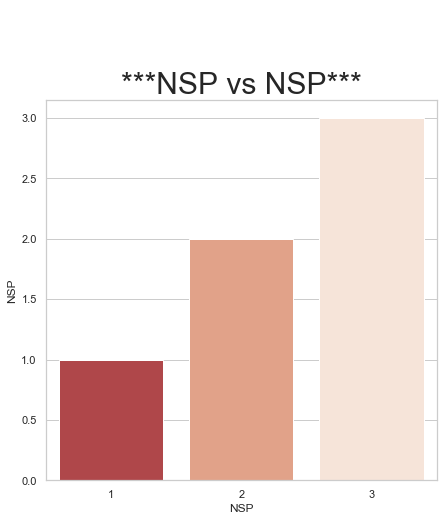

In [15]:
#visualising rest of the columns with NSP
for i in ctg_data.columns:
    if i not in dis_vars.columns:
        plt.figure(figsize = (7, 7))
        sns.barplot(ctg_data["NSP"], ctg_data[i])
        plt.title(label = "\n\n***{} vs NSP***".format(i), fontsize = 30)
        plt.show()
        
    else:
        continue

#### Some inferences -
- **b** and **e** variables need to be removed.
- One variable needs to be dropped out of **LBE** and **LB**, as they are highly multicorrelated.
- **AC** variable is correlated to **suspecion** or **pythogenic** if its value is below 0.5.
- **FM** variable has an inverse relation, higher the foetal movements more is the probability of **pythogenic** state of the fetus.
- Lower value of decelerations faces **normal** fetal state.
- **Short term** vs **Long term** Variability:

    1> In **abnormal** STV and LTV, for it to be a **normal** state its repetition should not be much w.r.t time. 
    
    2> Mean of STV is between **1.25 - 1.50** for **normal** state, between **0.50 - 0.75** for **suspecion** state and its more than **1.50** for **pathogenic** state. Whereas mean of LTV follows a decending order, **normal (>8) > suspecion (=8) > pathogenic (<4)**.
    
    
- **Mean , median and mode** variables are showing almost similar distribution with NSP states, also they have high multicollinearity.
- **High Variance** seems to be leaned towards the **pathogenic** state, whereas **lowest** makes it a **suspecion** state.  

In [25]:
#dropping b, e and LBE variables
ctg_data.drop(["b", "e", "LBE"], axis = 1, inplace = True)

##### Since, our dataset doesnt have any missing values and categorical features, there arn't seem to be any extreme outliers. So, going onto the modeling step for now. 

## Modelling

In [17]:
#splitting the independent and dependent variables
x_data = ctg_data.iloc[:,:-1]  #dependent variables
y = ctg_data.loc[:, "NSP"]  #target variable

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size = 0.25, random_state = 24)
logreg = LogisticRegression()
model = logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [19]:
print("Accuracy = {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy = 94.92%


In [20]:
def multiclass(y_test, y_pred, average = "macro"):
    
    lb = LabelBinarizer()
    y_test = lb.fit_transform(y_test)
    y_pred = lb.fit_transform(y_pred)
    
    return roc_auc_score(y_test, y_pred, average = average)

auc = multiclass(y_test, y_pred, average="macro")
print("ROC-AUC Score: {:.2f}".format(auc*100))

ROC-AUC Score: 92.34


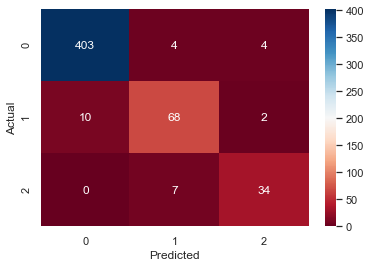

In [21]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "RdBu", fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Trying Repeated Stratified K-fold CV

In [44]:
n_folds = 10


def score(model, xdata, ydata):
    kf = RepeatedStratifiedKFold(n_folds, n_repeats = 3, random_state = 24).get_n_splits(xdata)
    accuracy = cross_val_score(model, xdata, ydata, scoring = "accuracy", cv = kf)
    #RA_score = cross_val_score(model, xdata, ydata, scoring = "roc_auc", cv = kf)
    
    return print("Accuracy Score: {:.2f}%".format(accuracy.mean()*100))

In [45]:
score(logreg, x_data, y)

Accuracy Score: 92.50%


## End notes - 
- My model with basic procedure is giving a decent enough score on the dataset.
- Alot of improvements can be done to further escalate the prediction score
- Main goal was to build a model on multi-class classification problem and achieve good enough prediction score.
- Now, main approach to impove the model will be focussed on feature engineering and trying other algorithms (like KNN, Decision Trees, Random Forest, SVC and Boosting), to further reduce the false predictions (especially False Negatives) and improving the metric scores.